Importing the required libraries

In [10]:
import numpy as np
import pandas as pd

uploading the dataset to colab

In [11]:
from google.colab import files

In [12]:
f=files.upload()

Saving chatgpt_reviews.csv to chatgpt_reviews (1).csv


In [13]:
df=pd.read_csv("chatgpt_reviews.csv")

In [14]:
df.head()

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


**Data cleaning**

In [15]:
# Standardize column names: convert to lowercase and replace spaces with underscores.
df.columns = df.columns.str.lower().str.replace(' ', '_')

print(df.columns)



Index(['review_id', 'review', 'ratings', 'review_date'], dtype='object')


In [16]:
#identify missing values
df.isnull().sum()

,0
review_id,0
review,6
ratings,0
review_date,0


In [17]:
df['review'] = df['review'].fillna('')

In [18]:
df['review_date'] = pd.to_datetime(df['review_date'],errors= 'coerce')

In [19]:
df['ratings'] = pd.to_numeric(df['ratings'],errors = 'coerce')

In [20]:
df.isnull().sum()

,0
review_id,0
review,0
ratings,0
review_date,0


In [23]:
# 1. Calculate Sentiment polarity.
from textblob import TextBlob
def get_sentiment_polarity(text):
    if pd.isna(text) or text == '':
        return 0
    blob = TextBlob(str(text))
    return blob.sentiment.polarity

df['sentiment_polarity'] = df['review'].apply(get_sentiment_polarity)

In [24]:
# 2. Assign Sentiment Category based on Polarity
def get_sentiment_category(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_polarity'].apply(get_sentiment_category)

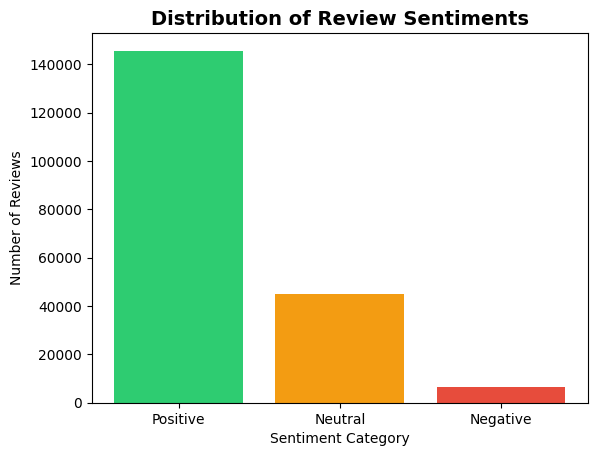

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
sentiment_counts = df['sentiment_category'].value_counts()
colors = ['#2ecc71', '#f39c12', '#e74c3c']
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
plt.title('Distribution of Review Sentiments', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()

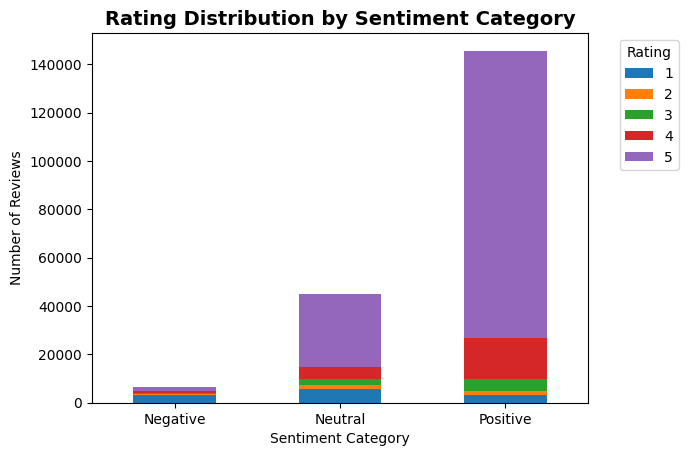

In [26]:
# 3. Rating Distribution by Sentiment Category
sentiment_rating = df.groupby(['sentiment_category', 'ratings']).size().unstack(fill_value=0)
sentiment_rating.plot(kind='bar', stacked=True)
plt.title('Rating Distribution by Sentiment Category', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

**Identifying negative reviews**

In [27]:
negative_reviews = df[df['sentiment_category'] == 'Negative']['review']

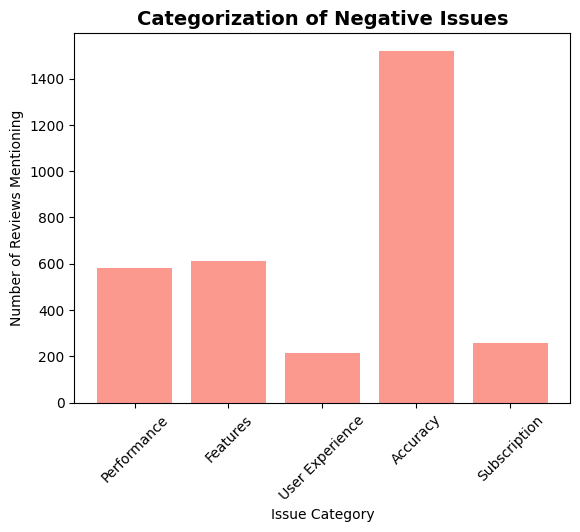

In [28]:
issue_categories = {
    'Performance': ['slow', 'lag', 'crash', 'freeze', 'glitch', 'bug', 'error'],
    'Features': ['missing', 'lack', 'need', 'want', 'should', 'feature'],
    'User Experience': ['confusing', 'difficult', 'hard', 'complicated', 'interface'],
    'Accuracy': ['wrong', 'incorrect', 'bad', 'poor', 'inaccurate', 'mistake'],
    'Subscription': ['expensive', 'price', 'cost', 'pay', 'subscription', 'money']
}

category_counts = {}
for category, keywords in issue_categories.items():
    count = 0
    for review in negative_reviews:
        if any(keyword in str(review).lower() for keyword in keywords):
            count += 1
    category_counts[category] = count

categories = list(category_counts.keys())
counts = list(category_counts.values())

plt.bar(categories, counts, color='salmon', alpha=0.8)
plt.title('Categorization of Negative Issues', fontsize=14, fontweight='bold')
plt.xlabel('Issue Category')
plt.ylabel('Number of Reviews Mentioning')
plt.xticks(rotation=45)

plt.show()

**Time Series Analysis**

In [29]:
#create Time-Series Analysis
df['Review_Month'] = df['review_date'].dt.to_period('M')
df['Review_Quarter'] = df['review_date'].dt.to_period('Q')

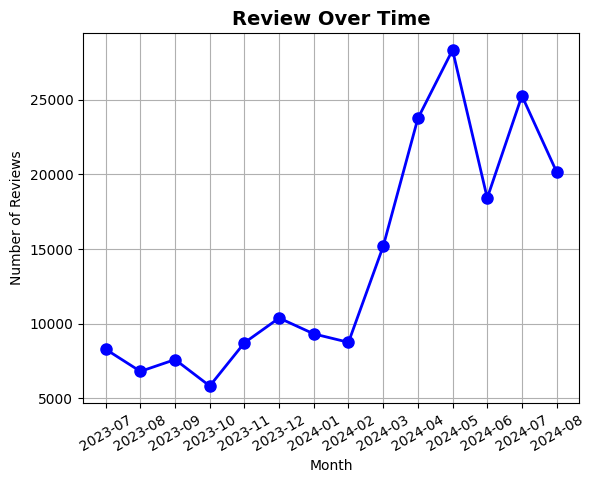

In [30]:
#Review over time
monthly_counts = df.groupby('Review_Month').size()
plt.plot(monthly_counts.index.astype(str), monthly_counts.values,
         marker='o', linewidth=2, markersize=8, color='blue')

plt.title('Review Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=30)
plt.grid(True)

plt.show()

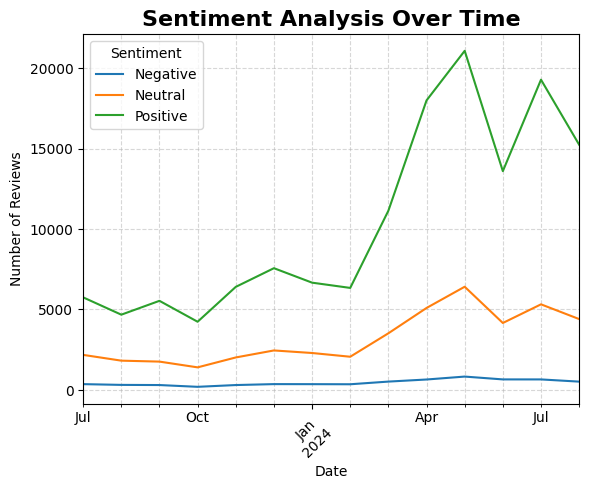

In [31]:
#Sentiment Review over Time
df['review_date'] = pd.to_datetime(df['review_date'])

sentiment_over_time = df.groupby([df['review_date'].dt.to_period('M'), 'sentiment_category']) \
                        .size().unstack(fill_value=0)

sentiment_over_time.index = sentiment_over_time.index.to_timestamp()
sentiment_over_time.plot()

plt.title('Sentiment Analysis Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='Sentiment')

plt.show()